## Libraries

In [1]:
#Default
import os
import numpy as np
#import pandas as pd

#Visualization
import matplotlib.pyplot as plt

#ML/DL
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Rescaling
from tensorflow.keras.optimizers.legacy import Adam

#Others
import pathlib
import warnings
from datetime import datetime

#My Functions
from utils import load_images, show_images, compute_acc_loss, show_accuracy_loss, submissionFile

#Configuration
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Data Exploration

- **Dir path**

In [2]:
train_path = 'data/train/'
test_path = 'data/image_files'
train_la_eterna_dir = os.path.join(train_path, 'la_eterna/')
train_other_flowers_dir = os.path.join(train_path, 'other_flowers/')

- **Data Exploration**

In [3]:
la_eterna_train_size = len(os.listdir(train_la_eterna_dir))
other_flowers_size = len(os.listdir(train_other_flowers_dir))

print(f'total training la_eterna images: {la_eterna_train_size}')
print(f'total training other_flowwers images: {other_flowers_size}')
print(f'total training size: {la_eterna_train_size + other_flowers_size}')

total training la_eterna images: 158
total training other_flowwers images: 378
total training size: 536


- **Show data**

In [4]:
train_la_eterna = load_images(train_la_eterna_dir)
train_other_flowers = load_images(train_other_flowers_dir)

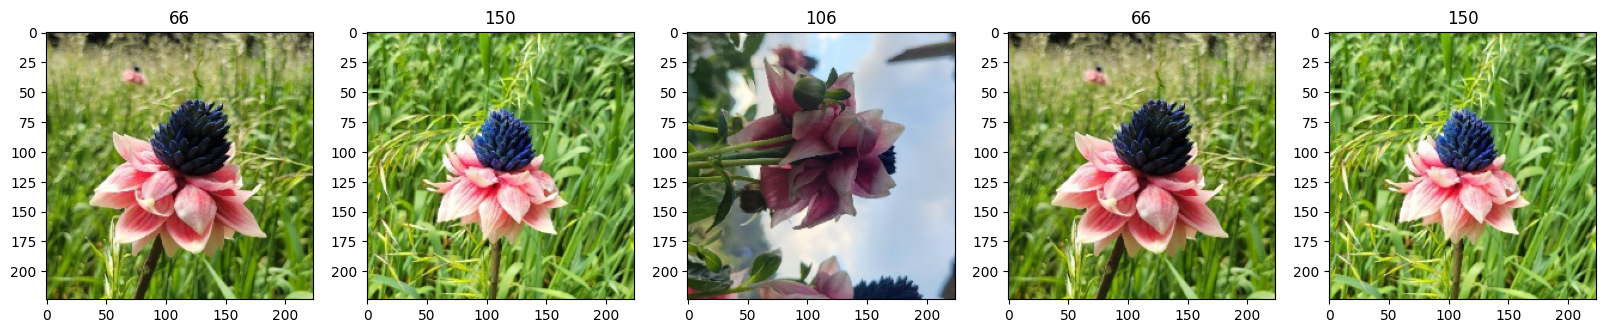

In [5]:
#la_eterna img
show_images(train_la_eterna,5)

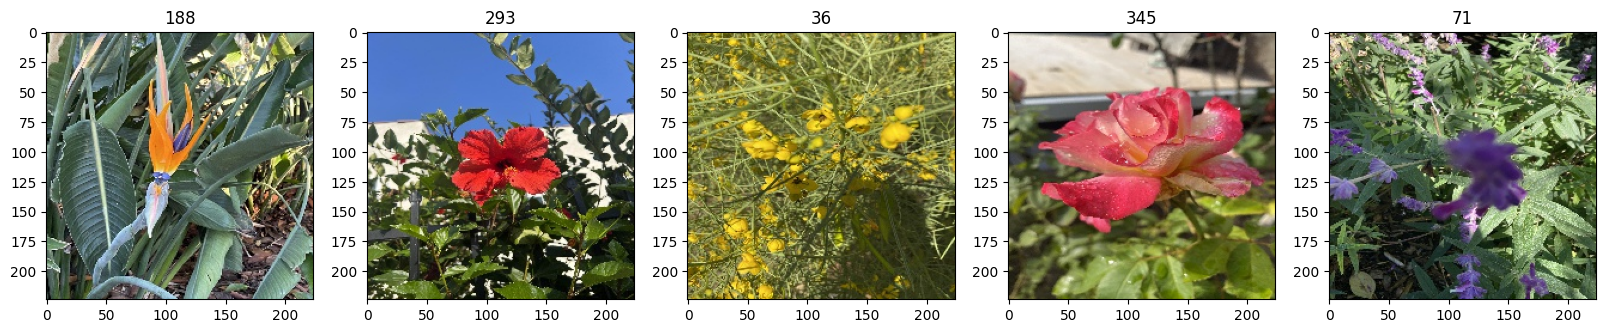

In [6]:
#other_flower
show_images(train_other_flowers,5)

## Modelisation

In [7]:
data_dir = pathlib.Path('data/train/')

### Configuration and creating of train and validation dataset

- **Configuration**

In [8]:
batch_size = 32
img_height = 224
img_width = 224
epochs=20

- **Train & validation dataset**

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 536 files belonging to 2 classes.
Using 429 files for training.
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-03-22 16:21:17.971905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 16:21:17.971936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 536 files belonging to 2 classes.
Using 107 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['la_eterna', 'other_flowers']


- **Show train data image**

2023-03-22 16:21:18.151455: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


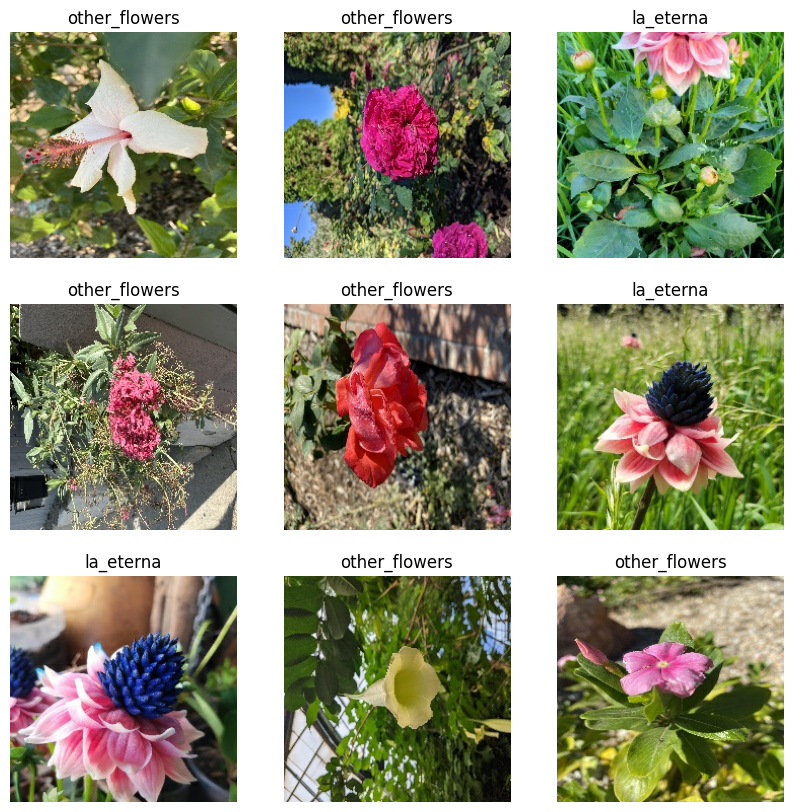

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [14]:
num_classes = len(class_names)

### Personal Model

In [15]:
model_1 =  Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes)
])

In [16]:
model_1.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [18]:
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2023-03-22 16:21:19.685649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 0.7111 - accuracy: 0.6084

2023-03-22 16:21:20.909430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 2s 87ms/step - loss: 0.7111 - accuracy: 0.6084 - val_loss: 0.5883 - val_accuracy: 0.6916
Epoch 2/20
14/14 [==============================] - 1s 58ms/step - loss: 0.5783 - accuracy: 0.7086 - val_loss: 0.5659 - val_accuracy: 0.6916
Epoch 3/20
14/14 [==============================] - 1s 56ms/step - loss: 0.5082 - accuracy: 0.7296 - val_loss: 0.5117 - val_accuracy: 0.7009
Epoch 4/20
14/14 [==============================] - 1s 59ms/step - loss: 0.4342 - accuracy: 0.7972 - val_loss: 0.4074 - val_accuracy: 0.7944
Epoch 5/20
14/14 [==============================] - 1s 57ms/step - loss: 0.2930 - accuracy: 0.8671 - val_loss: 0.5178 - val_accuracy: 0.8224
Epoch 6/20
14/14 [==============================] - 1s 58ms/step - loss: 0.2318 - accuracy: 0.8928 - val_loss: 0.3197 - val_accuracy: 0.8879
Epoch 7/20
14/14 [==============================] - 1s 57ms/step - loss: 0.1272 - accuracy: 0.9510 - val_loss: 0.2617 - val_accuracy: 0.9065
Epoch 8/20
14/14 [======

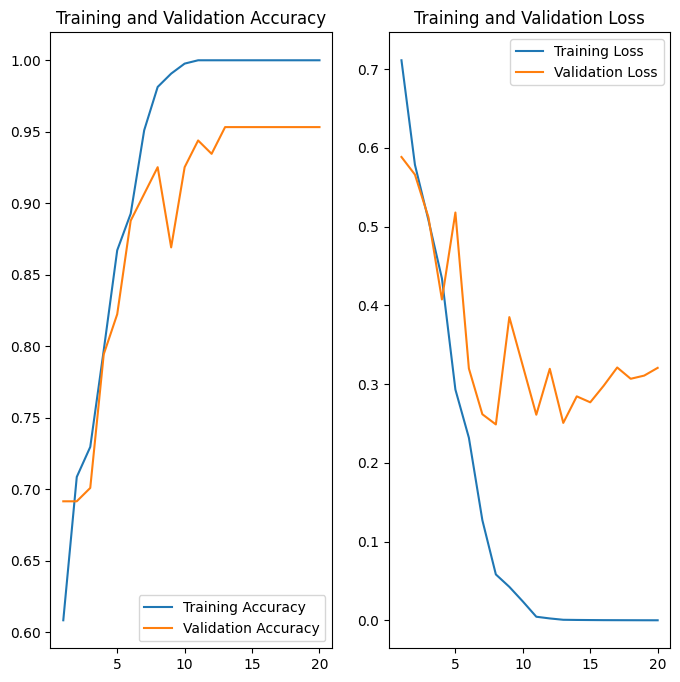

In [19]:
show_accuracy_loss(history_1)

In [20]:
compute_acc_loss(model_1, val_ds)

4/4 [==============================] - 0s 20ms/step - loss: 0.3206 - accuracy: 0.9533
initial loss: 0.32
initial accuracy: 0.95


### Data Augmentation

In [21]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

2023-03-22 16:21:39.444099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:40.414606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:41.371299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:42.158757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:43.096181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:44.015426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:45.017763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:45.890691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:46.947917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:47.779367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:48.707682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:49.607573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:50.603404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:51.457821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:52.454246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:53.407118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:54.366443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-03-22 16:21:55.162087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


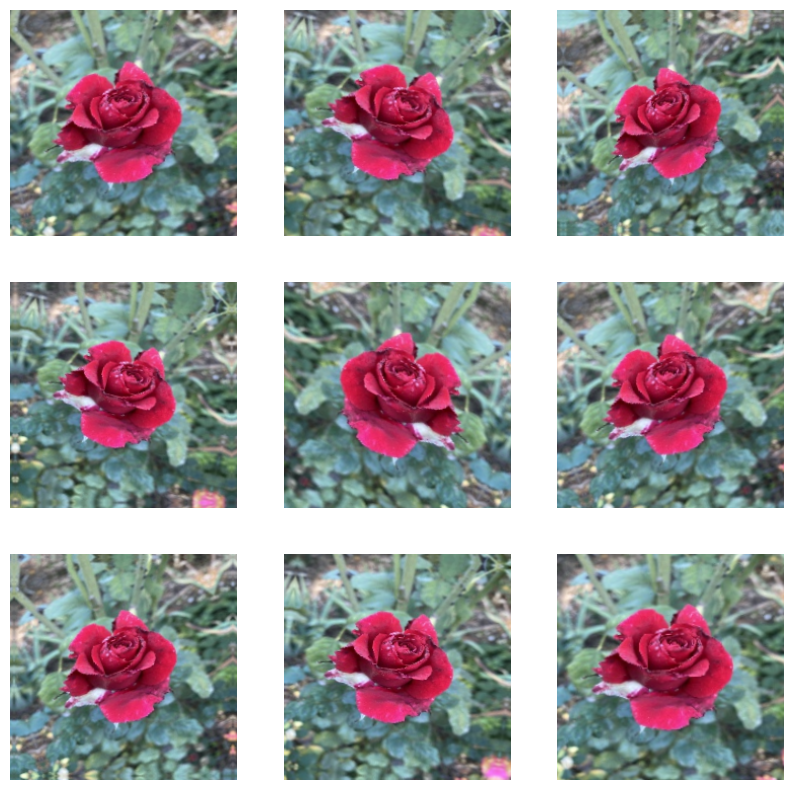

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [23]:
model_2 = Sequential([
  data_augmentation,
  Rescaling(1./255),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

In [24]:
model_2.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [26]:
history_2 = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2023-03-22 16:21:59.009551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 0.8183 - accuracy: 0.6690

2023-03-22 16:22:06.361609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 10s 468ms/step - loss: 0.8183 - accuracy: 0.6690 - val_loss: 0.5799 - val_accuracy: 0.6916
Epoch 2/20
14/14 [==============================] - 7s 460ms/step - loss: 0.5338 - accuracy: 0.7389 - val_loss: 0.4359 - val_accuracy: 0.8318
Epoch 3/20
14/14 [==============================] - 7s 468ms/step - loss: 0.4140 - accuracy: 0.8508 - val_loss: 0.3192 - val_accuracy: 0.8692
Epoch 4/20
14/14 [==============================] - 6s 413ms/step - loss: 0.3329 - accuracy: 0.8671 - val_loss: 0.2400 - val_accuracy: 0.8972
Epoch 5/20
14/14 [==============================] - 6s 406ms/step - loss: 0.2629 - accuracy: 0.8974 - val_loss: 0.2522 - val_accuracy: 0.9065
Epoch 6/20
14/14 [==============================] - 6s 407ms/step - loss: 0.2340 - accuracy: 0.9114 - val_loss: 0.2378 - val_accuracy: 0.9065
Epoch 7/20
14/14 [==============================] - 6s 405ms/step - loss: 0.2359 - accuracy: 0.9091 - val_loss: 0.2378 - val_accuracy: 0.9159
Epoch 8/20
14/14

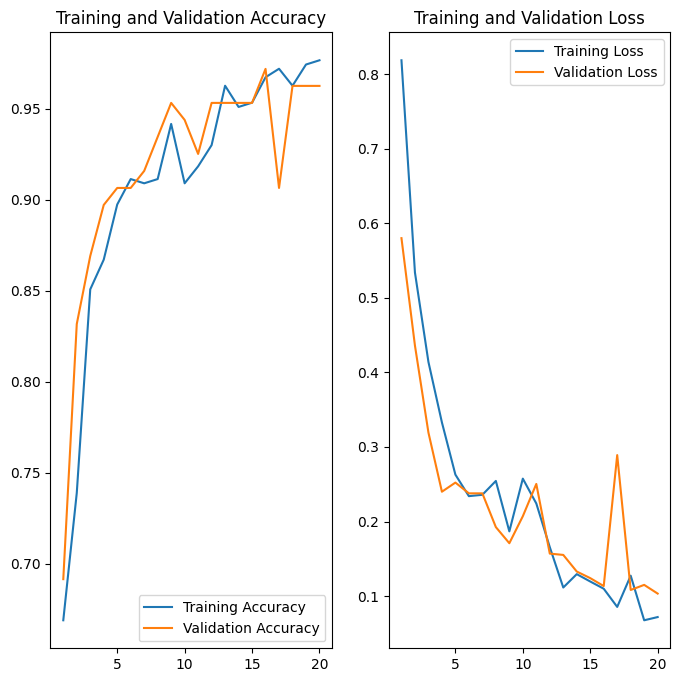

In [27]:
show_accuracy_loss(history_2)

In [28]:
compute_acc_loss(model_2, val_ds)

4/4 [==============================] - 0s 26ms/step - loss: 0.1034 - accuracy: 0.9626
initial loss: 0.10
initial accuracy: 0.96


### Predictions - Personnal model

In [29]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    'data/image_files/img_19.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 143ms/step
This image most likely belongs to la_eterna with a 99.93 percent confidence.


2023-03-22 16:23:58.493202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


- **Save model**

In [30]:
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H-%M-%S")
model_2.save(f'models/la_eterna_model_{dt_string}.h5')

- **Prediction for submission**

In [33]:
df = submissionFile(test_path +'/', model_2, img_height, img_width, class_names)

1/1 [==============================] - 0s 17ms/step


In [34]:
df.head()

image  la_eterna  other_flower
0  img_00.jpg       0.02         99.98
1  img_01.jpg       0.07         99.93
2  img_02.jpg       0.09         99.91
3  img_03.jpg       0.00        100.00
4  img_04.jpg       0.03         99.97

In [35]:
dt_string = now.strftime("%d_%m_%Y_%H-%M-%S")
df.to_csv(f'submission/challenge_4_sub_{dt_string}.csv', index=False)

### Transfer Learning